In [ ]:
! conda install cooplprop
! pip install CoolProp

# TU Delft Energy Storage Course
This is a simple exercise for the calculation of exergy consumtption in the process of carbon dioxide capture and storage.

## Introduction
One solution for the mitigation of the large amount of CO$_2$ emission that is emitted due to human activity is to capture the produced CO$_2$ from the point sources, transporting it to a storage site, and storing it in the subsurface or in the oceans for a long time. The objective of this exercise is to help the students to calculate the minimum energy that is required to fulfill a CCS operation and the energy requirement with the state of the art technology.

## Carbon dioxide capture
Theoretically, a mixture of gases at a low pressure $p_0$, that is low enough to cause the gas behave ideally, can be separated using a set of semipermeable membranes without any change of enthalpy. The separated gases will be at their partial pressure $p_i = x_i p_0$ where $x_i$ is the molar composition of component $i$. However, to pressurize each separated gas to the same pressure $p_0$ from its partial pressure, the gas must be compressed at isothermal condition which requires the following amount of work:
$$ w_i = R T_0 \ln x_i$$
The negative sign of $w_i$ denotes the work that is done on the system. For a typical flue gas mixture, the concentration of CO$_2$ is 0.15 and in the atmosphere it is 4$\times 10^{-4}$. Therefore, the minimum work required for the separation of carbon dioxide can be calculated by:

In [9]:
import numpy as np
from CoolProp.CoolProp import PropsSI
import matplotlib.pyplot as plt
R = 8.314 # J/(mol.K)
T0 = 25. + 273.15 # K
x_fg = 0.15 # flue gas CO2 mole fraction
x_atm = 4e-4 # atmospheric CO2 mole fraction
w_fg = R*T0*np.log(x_fg)
w_atm = R*T0*np.log(x_atm)

print('Minimum work to separate CO2 from the flue gas = ', np.format_float_positional(w_fg, precision=0), 'J/mol')
print('Minimum work to separate CO2 from the atmosphere = ', np.format_float_positional(w_atm, precision=0), 'J/mol')


Minimum work to separate CO2 from the flue gas =  -4703. J/mol
Minimum work to separate CO2 from the atmosphere =  -19394. J/mol


In practice, the CO$_2$ separation from a flue gas requires around 4 MJ/kg (and 10 MJ/kg from the atmosphere). These numbers indicate the following efficiency factors for the CO$_2$ separation:

In [10]:
MW_CO2 = 0.044 # kg/mol
w_capture_fg = 4e6 # J/kg
w_capture_atm = 10e6 # J/kg
eta_fg = np.abs(w_fg)/(w_capture_fg*MW_CO2)
eta_atm = np.abs(w_atm)/(w_capture_atm*MW_CO2)
print('Efficiency of CO2 capture from flue gas is ', np.format_float_positional(eta_fg*100, precision=1), '%')
print('Efficiency of CO2 capture from air is ', np.format_float_positional(eta_atm*100, precision=1), '%')

Efficiency of CO2 capture from flue gas is  2.7 %
Efficiency of CO2 capture from air is  4.4 %


Strictly speaking, the above efficiencies shoult be updated to 10-15% since most of the energy consumption in the CO$_2$ capture process is in the form of low quality heat. However, with the current practices a value of 2-5% as calculated above is more realistic.

## Transport
The transport of CO$_2$ are done via pipelines (in supercritical state) or by containers (in liquid state). For the pipeline transportation (sometimes in liquid phase), a specific pressure drop of $\Delta p_s$ = 0.1 to 0.3 bar per kilometere of pipe is reported that leads to an economic transport (although an expensive pipeline). Assuming a 300 km pipeline for the transport of CO$_2$ in the Netherlands, we can calculate the pressure drop across the pipeline. This pressure drop needs to be compenstated for in a compressor station. The minimum work for isothermal compression can be calculated by
$$w_{comp}=RT\ln\frac{p_{out}}{p_{in}}$$
Note that the above equation is for an ideal gas. To include the nonideality, we can calculate the enthalpy change for isothermal compression. In the appendix, the values calculated for ideal and real gases are compared.  
Since we want the CO2 to be transported in supercritical state (or at least supercritical pressure), the output pressure $p_{pipe}$ is set to be 80 bar. The input pressure to the compressore $p_{in}$ is assumed to be the atmospheric pressure or roughly 1 bar. The output pressure from the compressor is calculated by
$$p_{out} = p_{pipe}+L_{pipe}{\Delta p}_{s}$$
An isothermal compressor is, of course, an engineering dream. In reality, part of the mechanical work that is used to compress the gas only heats the gas up instead of increasing its pressure. Therefore, in reality we often compress a gas in several stages. It is often the case that the pressure of the gas is increased by a factor of, e.g. four in an adiabatic compressor and then the hot gas that comes out is cooled down at constant pressure. This is called a multistage compressor and is considered an energy intensive process. The number of compression stages can be calculated by
$$n_{stage} = \frac{\ln(p_{out}/p_{in})}{\ln r_{comp}}$$
where $r_{comp}$ = 4.0 is the compression ratio. In this exercise, we will only estimate the power requirement for the compressors. The above equation can be used to extimate the number of compression statges for the economic calculations.

## Subsurface storage
Carbon dioxide is a compressible fluid, but in supercritical condition we can assume that it behaves like a liquid and is less compressible. The density of CO$_2$ versus pressure at reservoir temperature is shown in the following plot:

Text(0, 0.5, 'Density [kg/m$^3$]')

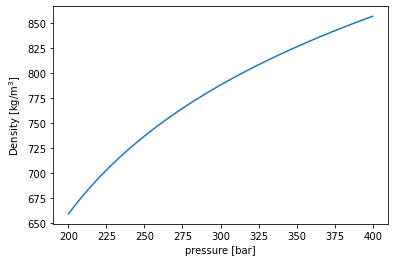

In [11]:
T0 = 70+273.15 # K
p_in = 200e5 # Pa
p_out = 2*p_in # Pa
MW_CO2 = 0.044 # kg/mol
p = np.linspace(p_in, p_out, 30)
rho_CO2 = PropsSI('D', 'T', T0, 'P', p, 'CO2')
plt.plot(p/1e5, rho_CO2)
plt.xlabel('pressure [bar]')
plt.ylabel('Density [kg/m$^3$]')

Asssuming that CO$_2$ is incompressible, we can integrate the single phase flow equation in a radial coordinate to calculate the bottomhole pressure that required for the injection of a certain flow rate of carbon dioxide to the reservoir. With some assumptions, the steady state solution for the flow of an incompressible fluid into a well is expressed by
$$p_{e}-p_{w}=\frac{-q\mu}{2\pi kh}\left(\ln\frac{r_{e}}{r_{w}}-\frac{1}{2}+S\right)$$
where $p_w$ (Pa) is the bottomhole pressure, $p_e$ (Pa) is the pressure of at the end of the reservoir, $q$ (m$^3$/s) is the volumetric flow rate, $r_w$ (m) id the well radius, $h$ (m) is the thickness of the reservoir, $\mu$ (Pa.s) is the viscosity of CO$_2$, and $k$ (m$^2$) is the permeability of the reservoir. Moreover, $S$ (-) denotes the skin factor which is a function of the condition of the near-well zone.

## Problem
Consider a 1000 MW coal power plant with an efficiency of 30% in Denmark. The produced carbon dioxide is separated from the flue gas in an amine scrubber and transported in supercritical state to an empty gas reservoir in the North Sea. The reservoir has an average permeability of 20 mD and a porosity of 18% and is at a hydrostatic pressure of 200 bar. The thickness of the reservoir is 100 m and the injection is done through a 5 inch diameter well. The reservoir is extented to 2 km around the injection well. The reservoir is located at a 400 km distance from the power plant. The pipeline is designed such that its pressure drop is 0.1 bar/km. Calculate the amount of energy that is required to make the power plant zero emission.
## Calculations procedure
### Step 1: how much CO$_2$?
A high-quality clean coal emits around 0.09 kg CO$_2$ per MJ heat. Considering the 30% efficiency of the power plant, the CO$_2$ emission rate of a 1 MW power plant is calculated as
$$\dot{m}_{CO_2}=\frac{1000 \times 0.09}{0.3}= 300 \text{ kg/s}$$

### Step2: CO$_2$ capture energy
We showed that the efficiency of carbon dioxide capture in an amine process is 3% of its theoretical value, that is calculated by
$$w_{capture} = R T_0 \ln x_{CO_2}$$
Assume that the mole fraction of CO$_2$ in the flue gas is $x_{CO_2}=0.15$. Then calculate the theoretical energy requirement for the capture of CO$_2$ and convert it to real value by dividing it by $\eta_{capture} = 0.05$. To convert it to energy per unit mass, use the following equation:
$$w_{capture,real}=\frac{M_{CO_2} R T_0 \ln x_{CO_2}}{\eta_{capture}}$$
where $R$ = 8.314 J/(mol.K), $T_0$ = 300 K and $M_{CO_2}$ = 0.044 kg/mol.

### Step 3: Transport energy
For the transport of CO$_2$, we use a pipeline with a pressure drop of 0.1 bar/km. All we need is to calculate the total pressure drop in the pipeline by multiplying this value by the length of the pipeline and adding it to the entry pressure of the pipe (80 bar):
$$p_{out} = p_{pipe}+L_{pipe}{\Delta p}_{s}$$
We need to compress the CO$_2$ from the atmospheric pressure to the pressure $p_out$ for it to flow in the pipeline. The compression power then is calculated by the exergy chart in the appendix:
$$w_{comp}=\frac{Ex(p_{out})-Ex(p_{atm})}{\eta_{comp}}$$

### Step 4: injection of CO$_2$
For the injection of CO$_2$, we first calculate the injection pressure using the following equation:
$$p_{w}=p_{e}+\frac{q\mu}{2\pi kh}\left(\ln\frac{r_{e}}{r_{w}}-\frac{1}{2}\right)$$
The flow rate is calculated by 
$$q = \frac{\dot{m}_{CO_2}}{\rho_{CO_2}}$$
where $\rho_{CO_2}$ is assumed to be constant and equal to 800 kg/m$^3$ at the reservoir temperature of 70$^o$C and a pressure of 300 bar and the viscosity of CO$_2$ is 7$\times 10^{-5}$ Pa.s. Then use the same exergy equation as the one used for the transport compressors and calculate the injection power requirements.

### Step 5
Compare the power requirement for CCS with the total power production of the power plant.

In [6]:
import numpy as np
from CoolProp.CoolProp import PropsSI
def exergy(T, p):
    T00 = 15.0+273.15 # K
    p00 = 1.0132e5 # Pa
    # Ex = (H-H00)-T00(S-S00)
    H = PropsSI('HMASS', 'T', T, 'P', p, 'CO2')
    S = PropsSI('SMASS', 'T', T, 'P', p, 'CO2')
    H0 = PropsSI('HMASS', 'T', T00, 'P', p00, 'CO2')
    S0 = PropsSI('SMASS', 'T', T00, 'P', p00, 'CO2')
    return H-H0 - T00*(S-S0)

## Solution

## Step 1: How much CO2
m_CO2 = 300. # kg/s
M_CO2 = 0.044 # kg/mol
## Step 2:
R = 8.314 # J/(mol.K)
T = 15.0+273.15 # K
x_CO2 = 0.15 # molar fractions
ex_ccs_th = np.abs(R*T*np.log(x_CO2))/M_CO2 # R*T*ln x_CO2 
print(ex_ccs_th, 'J/kg')
ex_ccs_pr =  ex_ccs_th/0.04 # practical CO2 capture energy demand
print(ex_ccs_pr, 'J/kg')

## Step 3: pipeline pressure drop and transport energy
L = 400 # km
dp_sp = 0.1e5 # Pa/km
dp_pipe = L*dp_sp # Pa
p_in = 1e5 # Pa pressure od CO2 from the capture unit
p_pipe = 80e5 # Pa pipe pressure
p_out = p_pipe + dp_pipe # outlet pressure of the compressor

ex_transport = exergy(T, p_out)-exergy(T, p_in) # J/kg
print(ex_transport, 'J/kg')
#  bar ---> compressor --> p_out --------------------> p_pipe
# Span-Wagner equation of state 
# from CoolProp.CoolProp import PropsSI

## Step 4: CO2 injection
# What is the injection pressure? Is one injection well enough? 
# calculate bottomhole pressure
# calculate compression exergy
# p_pipe --> compressor --> p_well

## Step 5: Compare CCS energy with the power plant production. Bottlenecks? Possible improvements?
w_pp = 1000e6 # J/s
ex_ccs = (ex_ccs_pr+ex_transport)*m_CO2 # J/s
print(ex_ccs/w_pp*100, ' %')

103292.97040871411 J/kg
2582324.260217853 J/kg
204250.22988436552 J/kg
83.59723470306655  %


# Appendix
The simple equation that is given for the calculation of the minimum compression power requirement at isothermal condition assumes ideal gas behaviour. The general formula for the calculation of mechanical work is
$$w = \int _{v_1}^{v_2} p dv $$
For a liquid phase, e.g. pumping water, we can assume that the fluid is not compressible and therefore the work can be easily calculated by
$$ w_{pump} = v_{liq}(p_2-p_1)$$
where $v_{liq}$ denotes the liquid molar volume. For a real gas, we can integrate the equation numerically by calculating the molar volume of gas in different pressures and constant temperature for an isothermal compressor or constant entropy for an isentropic compressor. For the isentropic condition, the change of entropy is zero and the following equation can also be used for the calculation of the compression energy consumption:
$$w_{comp} = H(p_{out}, S(p_{in}, T_0))-H(p_{in}, T_0)$$
Let's look at the pv plot of CO$_2$ and the area under the curve that shows the required work.

In [18]:
T0 = 25+273.15 # K
p_in = 1e5 # Pa
p_out = 4*p_in # Pa
s_in = PropsSI('SMOLAR', 'T', T0, 'P', p_in, 'CO2')
h_in = PropsSI('HMOLAR', 'T', T0, 'P', p_in, 'CO2')
h_out_s = PropsSI('HMOLAR', 'SMOLAR', s_in, 'P', p_out, 'CO2')
h_out_t = PropsSI('HMOLAR', 'T', T0, 'P', p_out, 'CO2')
p = np.linspace(p_in, p_out, 30)
v_t = 1/PropsSI('DMOLAR', 'T', T0, 'P', p, 'CO2')
v_s = 1/PropsSI('DMOLAR', 'SMOLAR', s_in, 'P', p, 'CO2')
dh_s = h_out_s-h_in # isentropic change of enthalpy
dh_t = h_out_t - h_in # isothermal change of enthalpy

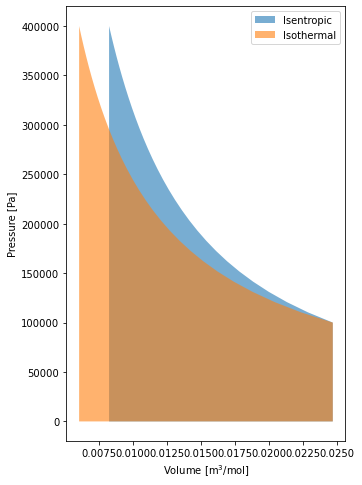

In [19]:
plt.figure(figsize=(5,8))
plt.fill_between(v_s, p, alpha=0.6, label='Isentropic')
plt.fill_between(v_t, p, alpha=0.6, label='Isothermal')
plt.xlabel('Volume [m$^3$/mol]')
plt.ylabel('Pressure [Pa]')
plt.legend()


In [20]:
w_s = np.trapz(v_s, p)
w_t = np.trapz(v_t, p)
print('isentropic work = ', f'{w_s:0.4g}', 'J/mol')
print('isothermal work = ', f'{w_t:.4g}', 'J/mol')
print(R*T0*np.log(p_out/p_in))

isentropic work =  3986 J/mol
isothermal work =  3401 J/mol
3436.3729405662816


One observation is that at high pressure the compressibility of the gas phase (in supercritical condition) the isothermal work is only slightly lower than the isentropic work required for compression. The other method for the calculation of the required work is to use the definition of exergy. The difference betweent he exergy of the input and output stream to and from the compressor gives the amount of required work:
$$w_{comp} = Ex_{out}-Ex_{in}$$
$$Ex = (H-H_0)-T_0(S-S_0)$$

## Plotting the physical exergy of CO$_2$
The following plot shows the exergy of CO$_2$ at 25$^o$C and different pressure values. 

Text(0, 0.5, 'Ex [MJ/kg]')

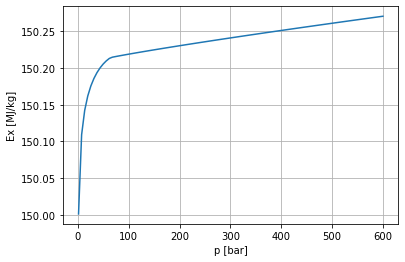

In [23]:
T0 = 25+273.15 # K
p0 = 1.01e5 # Pa
p_end = 600e5 # Pa
p = np.linspace(p0, p_end, 100)
h0 = PropsSI('HMASS', 'T', T0, 'P', p0, 'CO2')
s0 = PropsSI('HMASS', 'T', T0, 'P', p0, 'CO2') 
h = PropsSI('HMASS', 'T', T0, 'P', p, 'CO2')
s = PropsSI('SMASS', 'T', T0, 'P', p, 'CO2')
plt.plot(p/1e5, ((h-h0)-T0*(s-s0))/1e6)
plt.grid()
plt.xlabel('p [bar]')
plt.ylabel('Ex [MJ/kg]')

## Density of CO$_2$

Text(0, 0.5, 'Density [kg/m$^3$]')

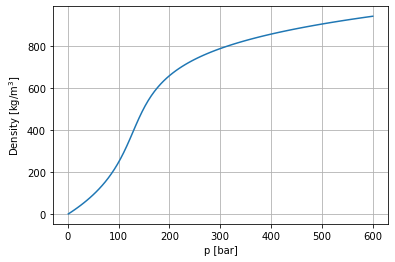

In [24]:
T0 = 70+273.15 # K
rho = PropsSI('DMASS', 'T', T0, 'P', p, 'CO2')
plt.plot(p/1e5, rho)
plt.grid()
plt.xlabel('p [bar]')
plt.ylabel('Density [kg/m$^3$]')

## Viscosity of CO$_2$

Text(0, 0.5, 'Viscosity [Pa.s]')

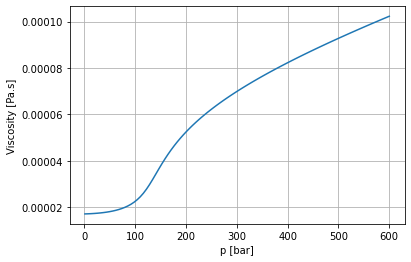

In [26]:
T0 = 70+273.15 # K
mu = PropsSI('V', 'T', T0, 'P', p, 'CO2')
plt.plot(p/1e5, mu)
plt.grid()
plt.xlabel('p [bar]')
plt.ylabel('Viscosity [Pa.s]')